<a href="https://colab.research.google.com/github/Anngatimu/Anngatimu/blob/main/ML2_PROJ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#load the dataset
df=pd.read_csv("data.csv")
df.head(5000)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,...,37.3,51.3,43.0,35.5,27.9,67.3,7.8,S16,3.0,2019
1402,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,2019
1403,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,...,33.9,51.6,48.8,35.1,29.0,65.4,-1.1,S16,12.0,2019
1404,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019


In [ ]:
#data descriptive statistics
#metadata
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

In [ ]:
# summary statistics
print(df.describe())

                 G            W        ADJOE        ADJDE      BARTHAG  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
mean     31.570413    16.724751   103.848720   103.849716     0.493272   
std       2.586927     6.492069     7.250998     6.422037     0.255095   
min      24.000000     1.000000    82.900000    85.200000     0.026600   
25%      30.000000    12.000000    98.900000    99.225000     0.281400   
50%      31.000000    16.000000   103.400000   104.000000     0.474000   
75%      33.000000    21.000000   108.300000   108.275000     0.711075   
max      40.000000    37.000000   128.400000   124.000000     0.974400   

             EFG_O        EFG_D          TOR         TORD          ORB  ...  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000  ...   
mean     50.406757    50.595448    18.458535    18.391821    28.881223  ...   
std       3.042034     2.779066     1.949515     2.082490     4.045938  ...   
min      40.00000

In [ ]:
# number of unique values for each column
df.nunique()

,0
TEAM,355
CONF,32
G,17
W,36
ADJOE,323
ADJDE,278
BARTHAG,1291
EFG_O,164
EFG_D,150
TOR,109


In [ ]:
#data processing
print(df.isnull().sum())

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64


In [ ]:
# Handle missing values (if any)
# Handle missing values (if any)
# Only include numeric features when computing the median
numeric_features = df.select_dtypes(include=np.number).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

In [ ]:
df.dropna()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,...,37.3,51.3,43.0,35.5,27.9,67.3,7.8,S16,3.0,2019
1402,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,2019
1403,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,...,33.9,51.6,48.8,35.1,29.0,65.4,-1.1,S16,12.0,2019
1404,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019


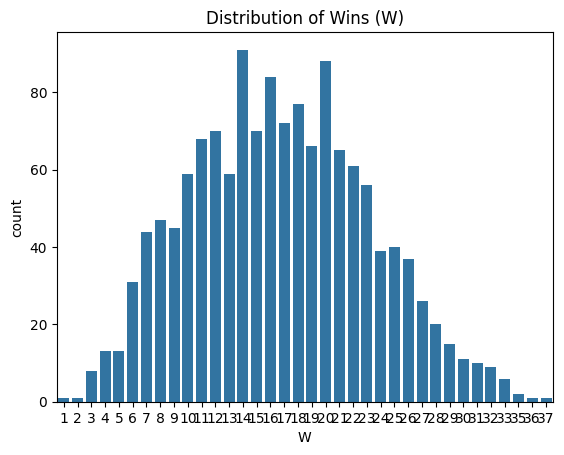

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='W', data=df)
plt.title('Distribution of Wins (W)')
plt.show()

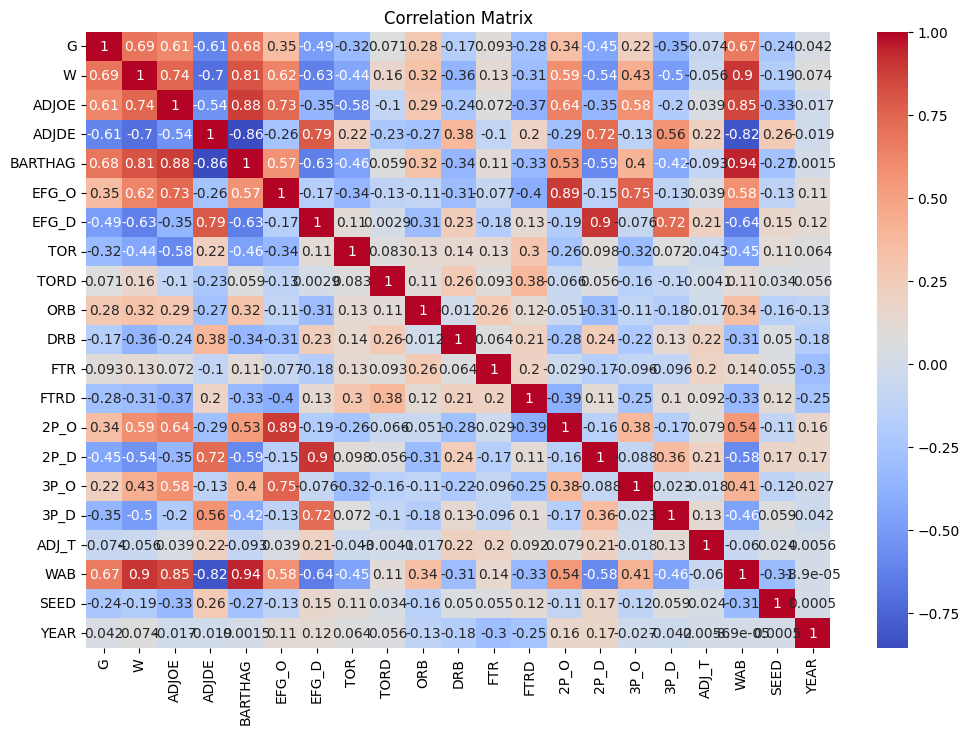

In [ ]:
#measures the strength and direction of a linear relationship between two variables
# Visualize correlations
plt.figure(figsize=(12, 8))
# Include only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Define features and target variable
X = df.drop(['W', 'TEAM', 'CONF', 'POSTSEASON'], axis=1)  # Drop 'POSTSEASON' along with other columns
y = df['W']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

In [ ]:
# Cross-validation on training set
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()
    print(f"{name} CV Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN CV Accuracy: 0.1192 (±0.0226)
Decision Tree CV Accuracy: 0.1254 (±0.0230)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVM CV Accuracy: 0.1486 (±0.0180)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression CV Accuracy: 0.1619 (±0.0255)


In [ ]:
# Train models on full training set and evaluate on test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_results[name] = accuracy_score(y_test, y_pred)
    print(f"\n{name} Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


KNN Test Accuracy: 0.1277
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.11      0.25      0.15         4
           7       0.17      0.29      0.21         7
           8       0.25      0.33      0.29         9
           9       0.20      0.09      0.12        11
          10       0.14      0.06      0.09        16
          11       0.06      0.11      0.08         9
          12       0.11      0.43      0.18         7
          13       0.07      0.09      0.08        11
          14       0.15      0.14      0.15        21
          15       0.15      0.15      0.15        13
          16       0.18      0.14      0.16        21
          17       0.11      0.18      0.13        11
          18       0.31      0.29      0.30        17


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


SVM Test Accuracy: 0.1028
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         4
           7       0.18      0.29      0.22         7
           8       0.09      0.11      0.10         9
           9       0.67      0.18      0.29        11
          10       0.17      0.06      0.09        16
          11       0.09      0.22      0.13         9
          12       0.09      0.29      0.14         7
          13       0.17      0.09      0.12        11
          14       0.17      0.24      0.20        21
          15       0.00      0.00      0.00        13
          16       0.06      0.05      0.05        21
          17       0.00      0.00      0.00        11
          18       0.19      0.18      0.18        17


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Logistic Regression Test Accuracy: 0.1454
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.25      0.25      0.25         4
           6       0.20      0.25      0.22         4
           7       0.18      0.29      0.22         7
           8       0.22      0.22      0.22         9
           9       0.00      0.00      0.00        11
          10       0.25      0.12      0.17        16
          11       0.07      0.11      0.08         9
          12       0.08      0.14      0.10         7
          13       0.17      0.18      0.17        11
          14       0.21      0.29      0.24        21
          15       0.07      0.08      0.07        13
          16       0.00      0.00      0.00        21
          17       0.08      0.09      0.08        11
          18       0.26      0.29     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
#Comparative Results Analysis
# Combine results
results_df = pd.DataFrame({
    'Model': list(test_results.keys()),
    'Test Accuracy': list(test_results.values()),
    'CV Accuracy': list(cv_results.values())
})

# Rank models by test accuracy
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)
print("\nModel Ranking by Test Accuracy:")
print(results_df.reset_index(drop=True))


Model Ranking by Test Accuracy:
                 Model  Test Accuracy  CV Accuracy
0  Logistic Regression       0.145390     0.161933
1        Decision Tree       0.138298     0.125433
2                  KNN       0.127660     0.119194
3                  SVM       0.102837     0.148587


The code above will load the dataset, perform exploratory data analysis, preprocess the data, normalize it, train various classification models, and evaluate their performance.
The final output will show the accuracy of each model on the test set and rank them accordingly.